# Titanic

# Đọc và tìm hiểu dữ liệu

In [1]:
import pandas as pd
import numpy as np

In [2]:
titanic = pd.read_csv(r'C:\Users\ADMIN\Data_Science\Titanic\train.csv')

In [3]:
test = pd.read_csv(r'C:\Users\ADMIN\Data_Science\Titanic\test.csv')

In [4]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Xử lý dữ liệu

In [9]:
X = titanic.copy()

In [10]:
X = X.drop(['PassengerId','Ticket'], axis = 1)

In [11]:
X.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


## Cabin

In [12]:
X['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [13]:
lst_cabin=[]
for i in X['Cabin'].unique():
    a = str(i)[0]
    if a not in lst_cabin:
        lst_cabin.append(a)
lst_cabin

['n', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T']

In [14]:
def cabin(cb):
    a = str(cb)[0]
    return a
X['Cabin'] = X['Cabin'].apply(cabin)

In [15]:
X.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,n,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,n,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,n,S


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='Cabin', ylabel='count'>

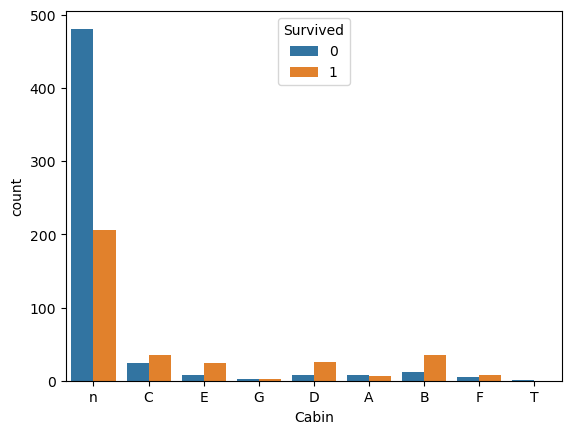

In [17]:
sns.countplot(data = X, x ='Cabin', hue = 'Survived')

In [18]:
def group_cabin(cabin):
    if cabin in ['A','B','C']:
        return 'ABC'
    elif cabin in ['D','E']:
        return 'DE'
    elif cabin in ['F','G','T']:
        return 'FGT'
    else:
        return 'N'
X['Group_cabin'] = X['Cabin'].apply(group_cabin)
    

In [19]:
test['Group_cabin'] = test['Cabin'].apply(group_cabin)

<AxesSubplot:xlabel='Group_cabin', ylabel='count'>

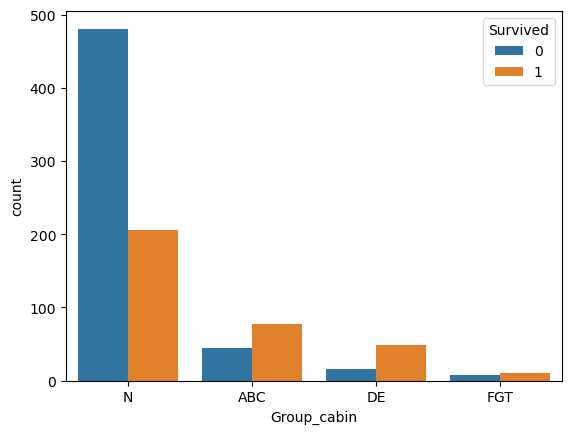

In [20]:
sns.countplot(data = X, x = 'Group_cabin', hue='Survived')

In [21]:
cabin_map = {'N':0,'ABC':1,'DE':2,'FGT':3}
X['Group_cabin'] = X['Group_cabin'].map(cabin_map)

In [22]:
test['Group_cabin'] = test['Group_cabin'].map(cabin_map)

## Name

In [23]:
X.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Group_cabin
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,n,S,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,n,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,n,S,0


In [24]:
lst_name=[]
for i in X['Name']:
    a = i.split(', ')[1].split('.')[0]
    if a not in lst_name:
        lst_name.append(a)
lst_name

['Mr',
 'Mrs',
 'Miss',
 'Master',
 'Don',
 'Rev',
 'Dr',
 'Mme',
 'Ms',
 'Major',
 'Lady',
 'Sir',
 'Mlle',
 'Col',
 'Capt',
 'the Countess',
 'Jonkheer']

In [25]:
def name(title):
    a = title.split(', ')[1].split('.')[0]
    return a
X['Name'] = X['Name'].apply(name)

In [26]:
test['Name'] = test['Name'].apply(name)

In [27]:
X['Name'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Name, dtype: int64

In [28]:
def group_title(title):
    if title == 'Mr':
        return title
    elif title in ['Mrs','Mme']:
        return 'Mrs'
    elif title in ['Miss','Ms','Mlle']:
        return 'Miss'
    elif title == 'Master':
        return title
    else: 
        return 'Rare'
X['Group_title']=X['Name'].apply(group_title)

In [29]:
test['Group_title']=test['Name'].apply(group_title)

<AxesSubplot:xlabel='Group_title', ylabel='count'>

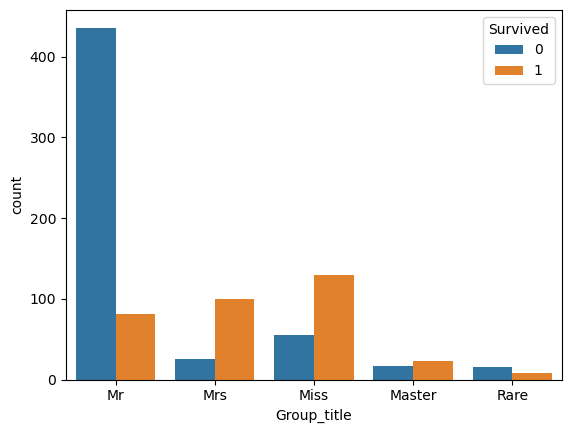

In [30]:
sns.countplot(data = X, x ='Group_title', hue ='Survived')

In [31]:
title_map ={'Mr':0,'Mrs':1,'Miss':2,'Master':3,'Rare':4}
X['Group_title'] = X['Group_title'].map(title_map)

In [32]:
test['Group_title'] = test['Group_title'].map(title_map)

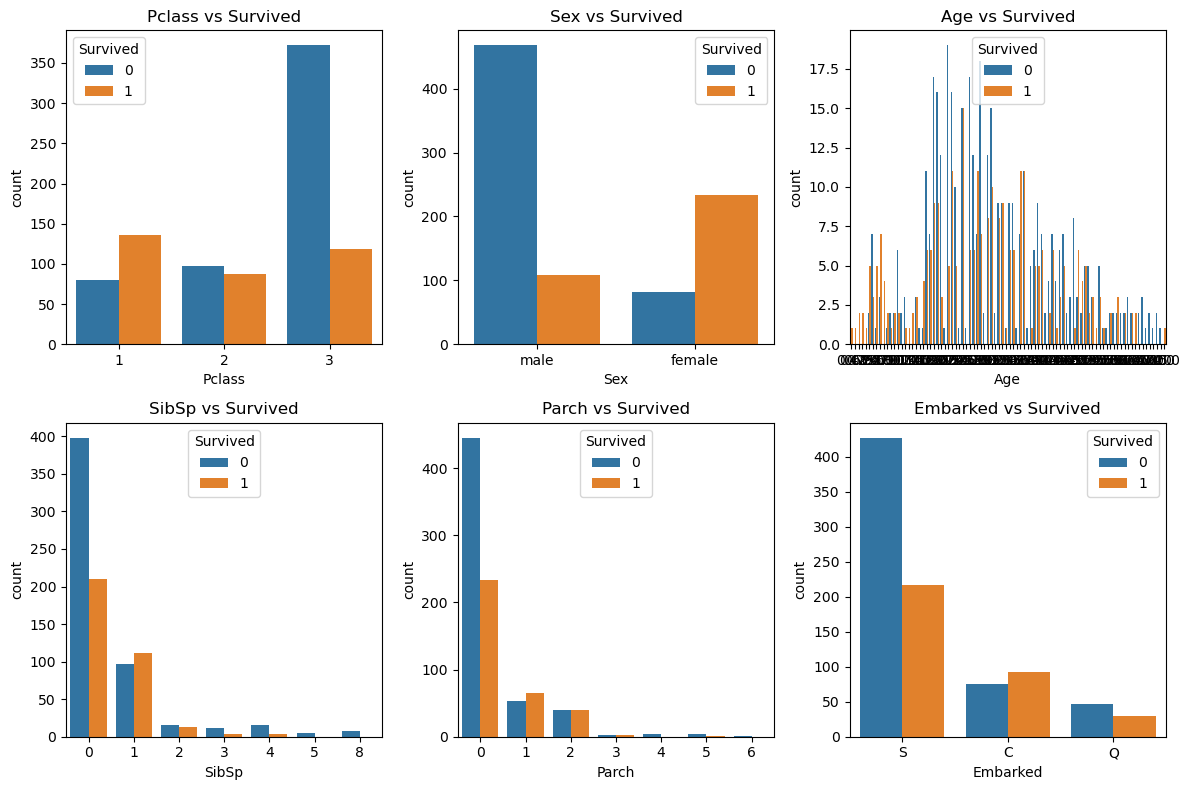

In [33]:
nrow = 2
ncol = 3
cols = ['Pclass','Sex','Age','SibSp','Parch','Embarked']
fig, ax = plt.subplots(nrow, ncol, figsize=(4*ncol,4*nrow))
for row in range(nrow):
    for col in range(ncol):
        k = row*ncol + col
        ax_k = ax[row,col]
        sns.countplot(data = X, x = cols[k], hue ='Survived', ax = ax_k)
        ax_k.set_title(f'{cols[k]} vs Survived')
plt.tight_layout()

## Family

In [34]:
X['Family'] = X['SibSp'] + X['Parch']

In [35]:
test['Family'] = test['SibSp'] + test['Parch']

<AxesSubplot:xlabel='Family', ylabel='count'>

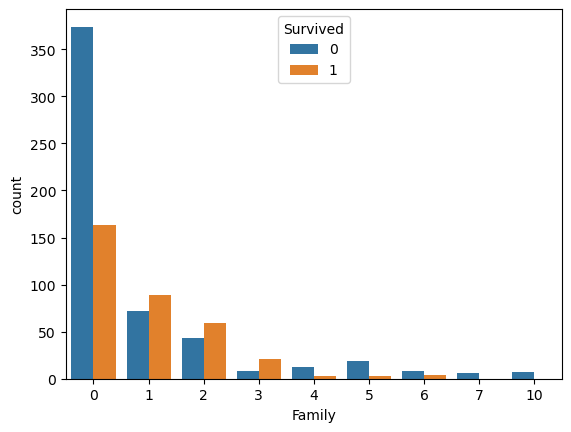

In [36]:
sns.countplot(data=X, x = 'Family', hue='Survived')

In [37]:
X['Group_family'] = pd.cut(X['Family'], (0,1,5,15), labels = (0,1,2), right =False)

In [38]:
test['Group_family'] = pd.cut(test['Family'], (0,1,5,15), labels = (0,1,2), right =False)

## Age

In [39]:
X.isna().sum()

Survived          0
Pclass            0
Name              0
Sex               0
Age             177
SibSp             0
Parch             0
Fare              0
Cabin             0
Embarked          2
Group_cabin       0
Group_title       0
Family            0
Group_family      0
dtype: int64

In [40]:
mean_age = X.groupby(['Sex','Pclass'])['Age']

In [41]:
X['Age'] = mean_age.apply(lambda x: x.fillna(x.median()))

In [42]:
mean_age_test = test.groupby(['Sex','Pclass'])['Age']
test['Age'] = mean_age_test.apply(lambda x: x.fillna(x.median()))

<AxesSubplot:xlabel='Age', ylabel='Count'>

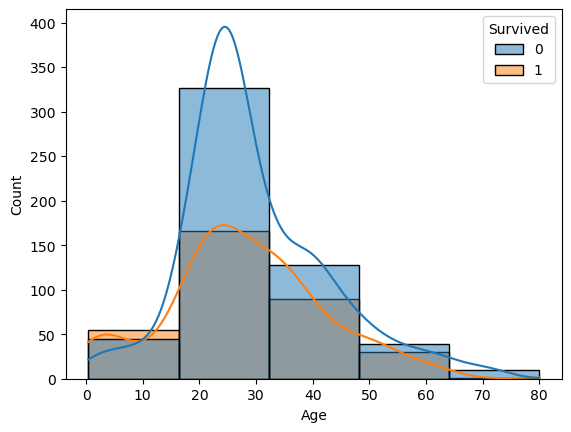

In [43]:
sns.histplot(data= X, x='Age', hue = 'Survived', bins = 5, kde = True)

In [44]:
X['Group_age'] = pd.cut(X['Age'], (0,16,32,48,64,85), labels = (0,1,2,3,4), right=False)

In [45]:
test['Group_age'] = pd.cut(test['Age'], (0,16,32,48,64,85), labels = (0,1,2,3,4), right=False)

## Fare

<AxesSubplot:xlabel='Fare', ylabel='Count'>

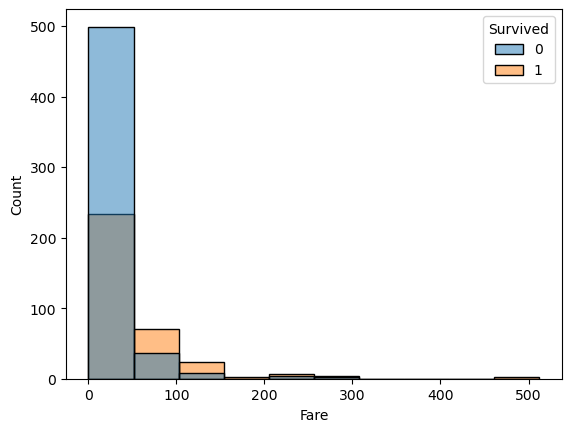

In [46]:
sns.histplot(data = X, x = 'Fare',hue='Survived', bins = 10)

In [47]:
X['Group_fare'] = pd.qcut(X['Fare'], 4, labels = (0,1,2,3))

<AxesSubplot:xlabel='Group_fare', ylabel='count'>

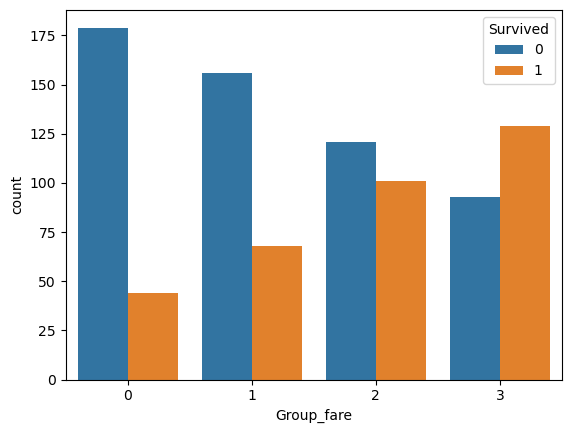

In [48]:
sns.countplot(data = X, x = 'Group_fare', hue = 'Survived')

In [49]:
test['Group_fare'] = pd.qcut(test['Fare'], 4, labels = (0,1,2,3))

In [50]:
X.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Group_cabin,Group_title,Family,Group_family,Group_age,Group_fare
0,0,3,Mr,male,22.0,1,0,7.2500,n,S,0,0,1,1,1,0
1,1,1,Mrs,female,38.0,1,0,71.2833,C,C,1,1,1,1,2,3
2,1,3,Miss,female,26.0,0,0,7.9250,n,S,0,2,0,0,1,1
3,1,1,Mrs,female,35.0,1,0,53.1000,C,S,1,1,1,1,2,3
4,0,3,Mr,male,35.0,0,0,8.0500,n,S,0,0,0,0,2,1


## Sex

In [51]:
sex_map = {'male':0,'female':1}
X['Sex'] = X['Sex'].map(sex_map)

In [52]:
test['Sex'] = test['Sex'].map(sex_map)

## Embarked

In [53]:
from sklearn.impute import SimpleImputer

In [54]:
X['Embarked'] = SimpleImputer(strategy='most_frequent').fit_transform(X[['Embarked']])

In [55]:
en_map = {'S':0,'C':1,'Q':2}
X['Embarked'] = X['Embarked'].map(en_map)

In [56]:
test['Embarked'] = test['Embarked'].map(en_map)

## Fare of test

In [57]:
test['Fare'] = SimpleImputer(strategy='median').fit_transform(test[['Fare']])

In [58]:
test['Group_fare'] = pd.qcut(test['Fare'], 4, labels = (0,1,2,3))

In [59]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Group_cabin,Group_title,Family,Group_family,Group_age,Group_fare
0,892,3,Mr,0,34.5,0,0,330911,7.8292,NaN,2,0,0,0,0,2,0
1,893,3,Mrs,1,47.0,1,0,363272,7.0000,NaN,0,0,1,1,1,2,0
2,894,2,Mr,0,62.0,0,0,240276,9.6875,NaN,2,0,0,0,0,3,1
3,895,3,Mr,0,27.0,0,0,315154,8.6625,NaN,0,0,0,0,0,1,1
4,896,3,Mrs,1,22.0,1,1,3101298,12.2875,NaN,0,0,1,2,1,1,1


In [60]:
X.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Group_cabin,Group_title,Family,Group_family,Group_age,Group_fare
0,0,3,Mr,0,22.0,1,0,7.2500,n,0,0,0,1,1,1,0
1,1,1,Mrs,1,38.0,1,0,71.2833,C,1,1,1,1,1,2,3
2,1,3,Miss,1,26.0,0,0,7.9250,n,0,0,2,0,0,1,1
3,1,1,Mrs,1,35.0,1,0,53.1000,C,0,1,1,1,1,2,3
4,0,3,Mr,0,35.0,0,0,8.0500,n,0,0,0,0,0,2,1


In [61]:
X = X.drop(['Name','Age','SibSp','Fare','Cabin','Family','Survived','Parch'], axis = 1)

In [62]:
y = titanic['Survived']

In [63]:
X_test = test.drop(['Name','Age','SibSp','Fare','Cabin','Family','Parch'], axis = 1)

In [64]:
X_test.drop(['PassengerId','Ticket'], axis = 1, inplace = True)

In [65]:
X_test.head()

,Pclass,Sex,Embarked,Group_cabin,Group_title,Group_family,Group_age,Group_fare
0,3,0,2,0,0,0,2,0
1,3,1,0,0,1,1,2,0
2,2,0,2,0,0,0,3,1
3,3,0,0,0,0,0,1,1
4,3,1,0,0,1,1,1,1


In [66]:
X.head()

,Pclass,Sex,Embarked,Group_cabin,Group_title,Group_family,Group_age,Group_fare
0,3,0,0,0,0,1,1,0
1,1,1,1,1,1,1,2,3
2,3,1,0,0,2,0,1,1
3,1,1,0,1,1,1,2,3
4,3,0,0,0,0,0,2,1


In [67]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Pclass        891 non-null    int64   
 1   Sex           891 non-null    int64   
 2   Embarked      891 non-null    int64   
 3   Group_cabin   891 non-null    int64   
 4   Group_title   891 non-null    int64   
 5   Group_family  891 non-null    category
 6   Group_age     891 non-null    category
 7   Group_fare    891 non-null    category
dtypes: category(3), int64(5)
memory usage: 38.1 KB


In [68]:
cat_features = ['Sex','Embarked','Group_cabin','Group_title','Group_family']
ordinal_features = ['Pclass']
num_features = ['Group_age','Group_fare']

In [69]:
for i in (cat_features + ordinal_features):
    X[i] = X[i].astype('category')
    X_test[i] = X_test[i].astype('category')
for i in num_features:
    X[i] = X[i].astype('int')
    X_test[i] = X_test[i].astype('int')

In [70]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Pclass        891 non-null    category
 1   Sex           891 non-null    category
 2   Embarked      891 non-null    category
 3   Group_cabin   891 non-null    category
 4   Group_title   891 non-null    category
 5   Group_family  891 non-null    category
 6   Group_age     891 non-null    int32   
 7   Group_fare    891 non-null    int32   
dtypes: category(6), int32(2)
memory usage: 13.2 KB


In [71]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Pclass        418 non-null    category
 1   Sex           418 non-null    category
 2   Embarked      418 non-null    category
 3   Group_cabin   418 non-null    category
 4   Group_title   418 non-null    category
 5   Group_family  418 non-null    category
 6   Group_age     418 non-null    int32   
 7   Group_fare    418 non-null    int32   
dtypes: category(6), int32(2)
memory usage: 6.7 KB


# Feature Engineering

In [72]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [76]:
cat_tranformer = Pipeline(steps = [
    ('cat_onehot', OneHotEncoder(handle_unknown = 'ignore')),
])
ordinal_tranformer = Pipeline(steps = [
    ('ordinal', OrdinalEncoder()),
])
num_tranformer = Pipeline(steps = [
    ('num', StandardScaler()),
])

In [77]:
preprocessor = ColumnTransformer(transformers=[
    ('cat', cat_tranformer, cat_features),
    ('ordinal', ordinal_tranformer, ordinal_features),
    ('num', num_tranformer, num_features)
])

In [78]:
X = preprocessor.fit_transform(X)

In [79]:
X.shape

(891, 20)

In [80]:
X_test = preprocessor.transform(X_test)

In [81]:
X_test.shape

(418, 20)

# Training

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [84]:
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(712, 20) (179, 20) (712,) (179,)


In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score

In [89]:
models= ({
    'RandomForestClassifier': RandomForestClassifier(),
    'LogisticRegression': LogisticRegression(),
    'KNeighborsClassifier': KNeighborsClassifier(n_neighbors = 5),
    'LinearSVC': LinearSVC(max_iter = 1500),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'XGBClassifier': XGBClassifier()
})
res1, res2 = [],[]
for i in models.keys():
    model = models[i]
    model.fit(X_train, y_train)
    res1.append(model.score(X_train, y_train))
    res2.append(cross_val_score(model, X_train, y_train, cv = 5).mean())
pd.DataFrame({'Model':models.keys(), 'Score':res1, 'CrossVal':res2})

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

,Model,Score,CrossVal
0,RandomForestClassifier,0.891854,0.803309
1,LogisticRegression,0.830056,0.821639
2,KNeighborsClassifier,0.848315,0.794937
3,LinearSVC,0.818820,0.809022
4,DecisionTreeClassifier,0.891854,0.797715
5,XGBClassifier,0.886236,0.804738


## Hyperparameter Tuning

### Random Forest

In [92]:
params = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [4, 5, 6, 7, 8],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'min_samples_split': [2, 3, 4, 5, 6],
    'criterion': ['gini', 'entropy']
}
ran = RandomForestClassifier()
grid = GridSearchCV(ran, param_grid = params, cv = 5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5, 6],
                         'n_estimators': [100, 200, 300, 400, 500]})

In [93]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 500}

In [95]:
model_ran = RandomForestClassifier(criterion = 'gini', max_depth = 8, min_samples_leaf = 1, min_samples_split = 4, n_estimators = 500)
model_ran.fit(X_train, y_train)
cv = cross_val_score(model_ran, X_train, y_train, cv = 5)
print(cv, '\nmean:', cv.mean())

[0.81118881 0.86713287 0.78169014 0.79577465 0.84507042] 
mean: 0.8201713779178569


### Logistic Regression

In [96]:
params = {
    'penalty': ['l1', 'l2','None'],
    'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
    'max_iter': [100, 200, 300, 400, 500, 700, 1000],
}
log = LogisticRegression()
grid = GridSearchCV(log, param_grid = params, cv = 5)
grid.fit(X_train, y_train)

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'max_iter': [100, 200, 300, 400, 500, 700, 1000],
                         'penalty': ['l1', 'l2', 'None'],
                         'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']})

In [97]:
grid.best_params_

{'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}

In [99]:
model_log = LogisticRegression(penalty = 'l2', solver = 'newton-cg', max_iter = 100)
model_log.fit(X_train, y_train)
cv = cross_val_score(model_log, X_train, y_train, cv = 5)
print(cv, '\nmean:', cv.mean())

[0.81118881 0.82517483 0.79577465 0.80985915 0.86619718] 
mean: 0.8216389244558258


### XGBoost

In [108]:
params = {
    'n_estimators': [50,100, 200, 300, 400, 500, 600, 700,800,900,1000],
}
xgb = XGBClassifier()
grid = GridSearchCV(xgb, param_grid = params, cv = 5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max

In [109]:
grid.best_params_

{'n_estimators': 500}

In [110]:
model_xgb = XGBClassifier(n_estimators = 500)
model_xgb.fit(X_train, y_train)
cv = cross_val_score(model_xgb, X_train, y_train, cv = 5)
print(cv, '\nmean:', cv.mean())

[0.8041958  0.85314685 0.78169014 0.79577465 0.82394366] 
mean: 0.8117502216093765


# Prediction

In [111]:
model_log = LogisticRegression(penalty = 'l2', solver = 'newton-cg', max_iter = 100)
model_log.fit(X, y)
pred = model_log.predict(X_test)

In [112]:
submission = pd.DataFrame({'PassengerId':test['PassengerId'], 'Survived':pred})

In [113]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [114]:
submission.to_csv('submission.csv', index = False)